In [1]:
import ROOT
from ROOT import gStyle

Welcome to JupyROOT 6.26/08


In [2]:
myFile_bkg = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/new_desktop/DoubleCoincidence_8ns_OpticalGel/FILTERED/HcompassF_DoubleCoincidence_8ns_OpticalGel_20231005_095508.root")

In [3]:
myFile_bkg.ls()

TFile**		/Users/bertabeltran/muon_data/data/new_desktop/DoubleCoincidence_8ns_OpticalGel/FILTERED/HcompassF_DoubleCoincidence_8ns_OpticalGel_20231005_095508.root	
 TFile*		/Users/bertabeltran/muon_data/data/new_desktop/DoubleCoincidence_8ns_OpticalGel/FILTERED/HcompassF_DoubleCoincidence_8ns_OpticalGel_20231005_095508.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title


In [4]:
dir_bkg = myFile_bkg.GetDirectory("Energy");

In [5]:
dir_bkg.ls()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


In [6]:
hist_bkg1 = dir_bkg.Get("_F_EnergyCH0@DT5751_1615;1")

In [7]:
hist_bkg2 = dir_bkg.Get("_F_EnergyCH1@DT5751_1615")

Info in <TCanvas::Print>: png file /Users/bertabeltran/muon_data/data/Chan0_vsChan1.png has been created


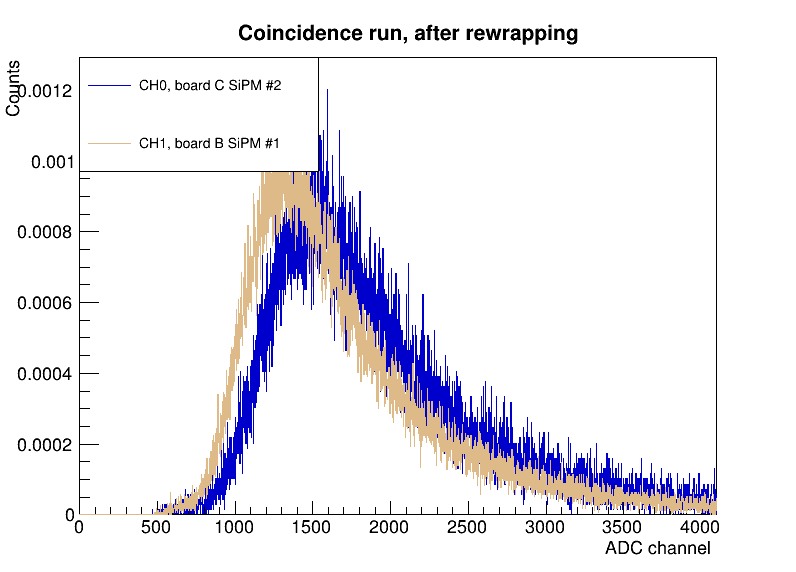

In [8]:

c = ROOT.TCanvas("myCanvasName","Scintillator with waveshifting fibre",800,600)
#hist_bkg.Rebin(4)
#hist_coin.Rebin(4)
hist_bkg1.SetFillColor(0)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)
hist_bkg1.SetNormFactor(1)
hist_bkg1.Draw()
hist_bkg1.GetYaxis().SetTitleOffset(1.5) #1.2

hist_bkg2.SetLineColor(42)
hist_bkg2.SetFillColor(0)
hist_bkg2.SetNormFactor(1)
hist_bkg2.Draw("same")
#c.SetLogy()
gStyle.SetOptStat(0)

leg = ROOT.TLegend(.1,.7,.4,.9)
leg.AddEntry(hist_bkg1,"CH0, board C SiPM #2 ","L")
leg.AddEntry(hist_bkg2,"CH1, board B SiPM #1","L")
leg.Draw()

tex=ROOT.TLatex(0.3,0.93,"Coincidence run, after rewrapping ");
tex.SetNDC();
tex.SetTextSize(0.04);
tex.Draw();

c.Draw()
c.SaveAs("/Users/bertabeltran/muon_data/data/Chan0_vsChan1.png");